# Chapter 1

## The effect of diversification
In this exercise you're going to compare performance of four individual stocks, to a portfolio of the same four stocks. You'll see that 2 out of the four stocks will under-perform over a time period of roughly four years, and two will perform quite well.

The stocks you're going to investigate are General Electric, JP Morgan, Microsoft and Proctor & Gamble.

Let's play a little game: pick one stock to invest in, then, let's see how it would have performed over time. There's a 50-50 chance that you'll pick a winning stock, versus a losing stock. Let's look at the data and see whether your stock is one of strong performers.

Available is a data set called stock_returns containing the cumulative returns of these four stocks over time, plus a portfolio of these stocks.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
stock_returns = pd.read_csv('./small_portfolio.csv', parse_dates=True, index_col='date')
stock_returns.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


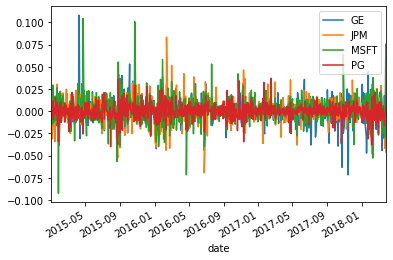

In [3]:
stock_returns.pct_change().plot()

## Calculate mean returns
In this exercise, you're going to calculate performance for a four stock portfolio over the period January 2015 through March 2019. The portfolio consists of Proctor & Gamble, Microsoft, JP Morgan and General Electric stocks. You'll discover that multiplying the mean return of each stock with its portfolio weight, is a very quick and straightforward way to calculate portfolio performance over a given period of time.

The four columns in the DataFrame data contain the prices of these four stocks mentioned above. Have a look at data by inspecting it in the console.

In [4]:
data = stock_returns

In [5]:
# Calculate percentage returns
returns = data.pct_change()

# Calculate individual mean returns 
meanDailyReturns = returns.mean()

# Define weights for the portfolio
weights = np.array([0.1, 0.4, 0.4, 0.1])

# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

# Print the portfolio return
print(portReturn)

0.0005884789815100914


## Portfolio cumulative returns
In the previous exercise, you've calculated the mean performance over a period of time. This gives you one performance number for that entire period. But what if you would want to plot the development of the performance over time? For that, you will need the cumulative performance, not the mean performance. Just like with interest in your bank account, the cumulative performance gives you the compounded return at each date in your dataset. It tells you; "up until today, this is what the total return has been since the start of my data."

Remember because of the compounding effect, you need to use cumprod() for this calculation. NumPy has already been imported as np and available are the daily returns data from the previous exercise under returns. Let's give it a try!

In [6]:
returns['Portfolio']= returns.dot(weights)

In [7]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print (daily_cum_ret.tail())

                  GE       JPM      MSFT        PG  Portfolio
date                                                         
2018-03-21  0.553871  1.836134  1.977759  0.851835   1.595935
2018-03-22  0.532721  1.759482  1.920231  0.844870   1.543317
2018-03-23  0.521548  1.712434  1.864414  0.839341   1.504619
2018-03-26  0.514366  1.765242  2.005560  0.844870   1.567661
2018-03-27  0.536313  1.730997  1.913388  0.860128   1.536197


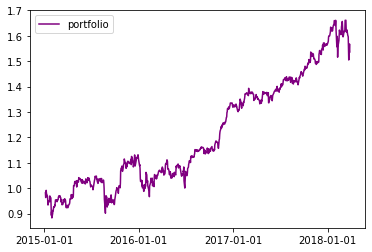

In [8]:
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

## Portfolio variance
Your turn! It's time to calculate the risk of our 4-stock portfolio. Let's start with the pricing data, available under data. You'll have to calculate daily percentage returns and assign weights to your portfolio. You'll then continue by calculating the covariance matrix, and use the following formula: Portfolio variance = Weights transposed x (Covariance matrix x Weights) to get the final portfolio variance.

As calculating portfolio variance is an important part of portfolio analysis, make sure you take your time to understand each step, and go back to the slides if you need to. Good luck!

In [9]:
# Get percentage daily returns
daily_returns = data.pct_change()

# Assign portfolio weights
weights = np.array([0.05,0.4,0.3,0.25])

In [10]:
# Calculate the covariance matrix on daily returns
cov_matrix = (daily_returns.cov())*250
print (cov_matrix)

            GE       JPM      MSFT        PG
GE    0.045987  0.022828  0.016285  0.010101
JPM   0.022828  0.046660  0.024135  0.010812
MSFT  0.016285  0.024135  0.054054  0.014144
PG    0.010101  0.010812  0.014144  0.020645


In [11]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

2.55%


## Standard deviation versus variance
Let's talk about the difference between variance and standard deviation. From the video you already know that the standard deviation σ is simply the square root of the variance. Both measures are used in practice to calculate market or stock volatility. Why should you use one or the other?

In the variance calculation we square the weights and the variances. Because of this squaring, the variance is no longer in the same unit of measurement as the original data. Taking the root of the variance means the standard deviation is restored to the original unit of measure and therefore much easier to interpret.

Let's calculate the standard deviation. Available are the weights and the cov_matrix from the previous exercise.

In [12]:
    # Calculate the standard deviation by taking the square root
    port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix,weights)))

    # Print the results 
    print(str(np.round(port_standard_dev, 4) * 100) + '%')

15.959999999999999%


# Chapter 2 

## Annualizing portfolio returns
Suppose you invested $101 at the beginning of 2015 in a portfolio. By the end of March 2018, you wonder how your portfolio has performed over time, and whether it is as good as another portfolio which started trading mid-2016. What performance metric do you look at? Well, the annualized return of course!

So let's calculate the annualized rate of return for your portfolio. Since our sample covers 3.2 years, let's use the monthly denomination in the formula for annualized returns. The number of months is already given under months.

Available are the data on portfolio returns under pf_returns, as well as as a separate series pf_AUM containing the portfolio's value, or assets under management (AUM). Good luck!

In [13]:
pf_AUM = 101 * daily_cum_ret.Portfolio
pf_AUM.iloc[0] = 101

In [14]:
pf_AUM

date
2015-01-02    101.000000
2015-01-05     99.136533
2015-01-06     97.271780
2015-01-07     97.880567
2015-01-08    100.137073
                 ...    
2018-03-21    161.189414
2018-03-22    155.875036
2018-03-23    151.966525
2018-03-26    158.333762
2018-03-27    155.155927
Name: Portfolio, Length: 813, dtype: float64

In [15]:
pf_returns = returns['Portfolio'].dropna()

In [16]:
pf_returns.head()

date
2015-01-05   -0.018450
2015-01-06   -0.018810
2015-01-07    0.006259
2015-01-08    0.023054
2015-01-09   -0.012645
Name: Portfolio, dtype: float64

In [17]:
months = 12 * (pf_returns.index[-1].year - pf_returns.index[0].year) + (pf_returns.index[-1].month - pf_returns.index[0].month)
print((months))

38


In [18]:
# Calculate total rate of return from start to end
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

# Annualize return
annualized_return = ((1 + total_return)**(12/months))-1
print (annualized_return)

0.14519119214282705


## Comparing annualized rates of return
In the last exercise, you saw that the annualized rate of return was 19.6%. That's pretty high! But since your portfolio consists of only 4 stocks, this high return is indeed possible as it is not very diversified. Let's compare the portfolio's annual rate of return, with that of the S&P500, which is much more diversified.

The value of the S&P500 between 1st of January 2015 and end of December 2018 has been made available. That's 4 years of data. You have full years this time, so use the year denomination in the formula for the annualized return. The data is stored under sp500_value.

In [19]:
sp500_value = pd.read_csv('sp500.csv', parse_dates=True, index_col='date')['S&P500']

In [20]:
sp500_value.head()

date
2015-01-02    2058.199951
2015-01-05    2020.579956
2015-01-06    2002.609985
2015-01-07    2025.900024
2015-01-08    2062.139893
Name: S&P500, dtype: float64

In [21]:
# Calculate the total return from the S&P500 value series
total_return = (sp500_value[-1] - sp500_value[0]) / sp500_value[0]
print(total_return)

# Annualize the total return spanning 4 years
annualized_return = ((1 + total_return)**(12/48))-1
print (annualized_return)

0.3762365831481841
0.08311176814071208


## S&P500 Sharpe ratio
In this exercise, you're going to calculate the Sharpe ratio of the S&P500, starting with pricing data only. In the next exercise, you'll do the same for the portfolio data, such that you can compare the Sharpe ratios of the two.

Available for you is the price data from the S&P500 under sp500_value. The risk-free rate is available under rfr, which is conveniently set to zero. Let's give it a try!

In [22]:
rfr = 0

In [23]:
# Calculate total return and annualized return from price data 
total_return = (sp500_value[-1] - sp500_value[0]) /  sp500_value[0]

# Annualize the total areturn over 4 year 
annualized_return = ((1 + total_return)**(12/48))-1

# Create the returns data 
returns_sp500 = sp500_value.pct_change()

# Calculate annualized volatility from the standard deviation
vol_sp500 = returns_sp500.std() * np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) / vol_sp500)
print (sharpe_ratio)

0.6105038859521851


## Portfolio Sharpe ratio
In this exercise you are now going to calculate the Sharpe ratio of the portfolio. How do you think the portfolio Sharpe ratio will be different to the S&P500 Sharpe ratio? You'll find out in this exercise.

You have the portfolio value over time under pf_AUM and the number of months for that data under months. Last, the risk-free rate is available under rfr, which is still set to zero.

In [24]:
# Calculate total return and annualized return from price data 
total_return = (pf_AUM[-1] -pf_AUM[0]) / pf_AUM[0]

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(12/months))-1

# Create the returns data 
pf_returns = pf_AUM.pct_change()

# Calculate annualized volatility from the standard deviation
vol_pf = pf_returns.std()*np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) /vol_pf)
print (sharpe_ratio)

0.8406304401458682


## Skewness of the S&P500
We already know from the video that the S&P500 should be normally distributed, without too much skewness (when you have enough data). However, since you're working with a short data sample spanning only a few years, there might actually be some skewness in your sample. To make you aware of this potential sample skewness, let's plot the data and have a look.

The returns data from the S&P500 is available as returns_sp500.

In [25]:
import seaborn as sns

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

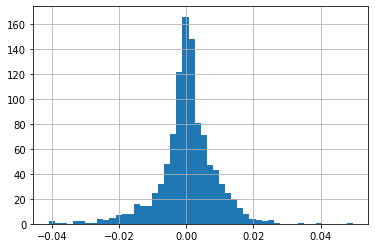

In [26]:
returns_sp500.hist(bins=50)
plt.plot

## Calculating skewness and kurtosis
You just saw the histogram of the S&P500 data, let's now put it into numbers and calculate skewness and kurtosis. For the full picture of the distribution, you'll also look at the mean and standard deviation. Available are the S&P500 returns data under returns_sp500, which is all you need for this.

In [27]:
# Print the mean
print("mean : ", returns_sp500.mean()*100)

# Print the standard deviation
print("Std. dev  : ", returns_sp500.std()*100)

# Print the skewness
print("skew : ", returns_sp500.skew())

# Print the kurtosis
print("kurt : ", returns_sp500.kurtosis())

mean :  0.03389998442910265
Std. dev  :  0.8610018502291801
skew :  -0.38319945187627896
kurt :  3.9223911008585035


## Comparing distributions of stock returns
Let's have a look at how you can use skewness and kurtosis in your investment decisions. In this exercise you're going to compare the distributions of singular stocks with the portfolio, and see whether combining multiple stocks in a portfolio improves your returns distribution.

c:\users\brama\miniconda3\envs\fin\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\brama\miniconda3\envs\fin\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\brama\miniconda3\envs\fin\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\users\brama\miniconda3\envs\fin\

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A8EDBB1978>,
      dtype=object)

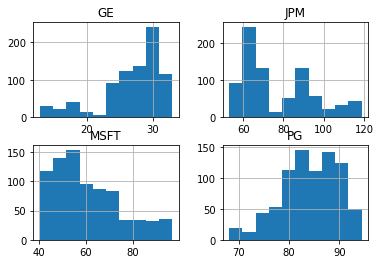

In [28]:
stock_returns.hist()

In [29]:

# Print skewness and kurtosis of the stocks
print ("skew : ", stock_returns.skew())
print ("kurt : ", stock_returns.kurtosis())

skew :  GE     -1.315660
JPM     0.743794
MSFT    0.755347
PG     -0.496022
dtype: float64
kurt :  GE      1.071946
JPM    -0.641370
MSFT   -0.315214
PG     -0.226965
dtype: float64


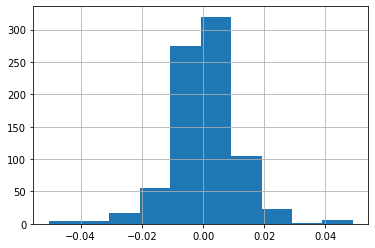

skew :  -0.12957445484267469
kurt :  3.8122026653057426


In [30]:
# Print the histogram of the portfolio
pf_returns.hist()
plt.show()

# Print skewness and kurtosis of the portfolio
print ("skew : ", pf_returns.skew())
print ("kurt : ", pf_returns.kurtosis())

### note 

skew is significant when the value is bigger that 0.5
kurtosis is significant when the value is bigger than 3

values within the range can be considered as normal distribution

## Sortino ratio
For this exercise, the portfolio returns data are stored in a DataFrame called df, which you'll use to calculate the Sortino ratio. The Sortino ratio is just like the Sharpe ratio, except for that it uses the standard deviation of the negative returns only, and thereby focuses more on the downside of investing.

Let's see how big the Sortino ratio is compared to the earlier calculated Sharpe ratio. The risk-free rate rfrand the target return target are already defined and are both zero.

In [31]:
df = pd.DataFrame(pf_returns)
df.columns=['pf_returns']
target = 0

In [32]:
# Create a downside return column with the negative returns only
downside_returns = df.loc[df['pf_returns'] < target]

# Calculate expected return and std dev of downside
expected_return = df['pf_returns'].mean()
down_stdev = downside_returns['pf_returns'].std()

# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev

# Print the results
print("Expected return  : ", expected_return*100)
print("Downside risk   : ", down_stdev*100)
print("Sortino ratio : ", sortino_ratio)

Expected return  :  0.05884789815100911
Downside risk   :  0.8121333446126475
Sortino ratio :  0.07246088162908397


## Maximum draw-down portfolio
In this exercise, you'll learn how to calculate the maximum draw-down of the S&P500 (also known as "peak to trough performance drop"). Maximum draw-down is an incredibly insightful risk measure. It tells you what has been the worst performance of the S&P500 in the past years.

It is the reason why many investors shy away from crypto-currencies; nobody likes to lose a large percentage of their investment (e.g., 70%) in a short period.

In order to calculate the maximum draw-down of the S&P500, the daily S&P500 prices have been made available to you in a DataFrame called df.

In [33]:
df = pd.read_csv('sp500.csv', parse_dates=True, index_col='date')
df.head()

,S&P500
date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893


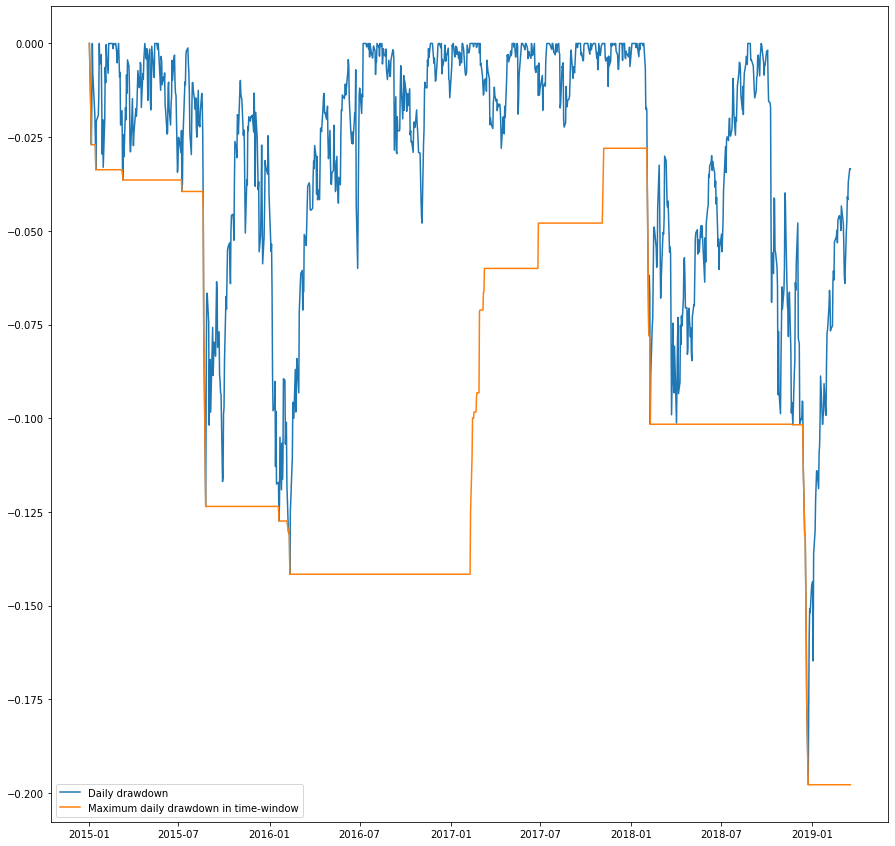

In [34]:
# Calculate the max value 
roll_max = df.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = df/roll_max - 1

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(df.index, daily_draw_down, label='Daily drawdown')
plt.plot(df.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

# Chapter 3

In [35]:
portfolio_data = pd.read_csv('large_pf.csv')
portfolio_data.head()

,Unnamed: 0,mean_return,variance,pf_weights,bm_weights,Security,GICS Sector,GICS Sub Industry
0,A,0.146146,0.035194,0.000,0.0,Agilent Technologies Inc,Health Care,Health Care Equipment
1,AAL,0.444411,0.094328,0.214,0.0,American Airlines Group,Industrials,Airlines
2,AAP,0.242189,0.029633,0.000,0.0,Advance Auto Parts,Consumer Discretionary,Automotive Retail
3,AAPL,0.225074,0.027283,0.000,0.0,Apple Inc.,Information Technology,Computer Hardware
4,ABBV,0.182541,0.029926,0.000,0.0,AbbVie,Health Care,Pharmaceuticals


## Active return
In this first exercise, you're going to calculate the active return of a portfolio that's managed against a benchmark. You've learned many ways of how to calculate total return over a period. For this exercise, you'll use the simple mean returns multiplied with the weights to obtain a total return for both the portfolio as well as the benchmark. Available is portfolio data containing weights and asset returns under portfolio_data. Have a look at the data by running portfolio_data.head(10) in the IPython Shell. Good luck!

In [36]:
# Check the portfolio weights
print(portfolio_data.pf_weights.sum())

100.0


In [37]:
# Calculate return of the portfolio
total_return_pf = (portfolio_data['mean_return']*portfolio_data['pf_weights']).sum()

In [38]:
# Calculate return of the benchmark
total_return_bm = (portfolio_data['mean_return']*portfolio_data['bm_weights']).sum()

In [39]:
# Calculate and print the active return
active_return = total_return_pf - total_return_bm
print ("%.2f%%" % active_return)

22.58%


## Industry attribution
In this exercise, you're going to calculate the relative industry position of your portfolio, versus a benchmark. As a portfolio manager you need to understand your portfolio's underweight and overweight positions (or "industry bets"), as they are a large driver of performance, as well as a potential source of risk.

The DataFrame portfolio_data is available, containing details about the industry classification, obtained from the Global Industry Classification System or "GICS", of your portfolio holdings, as well as your portfolio weights and the benchmark weights.

In [40]:
# Print the sum of the bm and pf weights
print (portfolio_data.pf_weights.sum())
print (portfolio_data.bm_weights.sum())

100.0
100.001


In [41]:
# Group dataframe by GICS sectors 
grouped_df=portfolio_data.groupby('GICS Sector').sum()

In [42]:
# Calculate active weights of portfolio
grouped_df['active_weight']=grouped_df['pf_weights']-grouped_df['bm_weights']
print (grouped_df['active_weight'])

GICS Sector
Consumer Discretionary         20.257
Consumer Staples               -5.176
Energy                          0.000
Financials                     -2.116
Health Care                     2.865
Industrials                     2.465
Information Technology          8.693
Materials                      -2.043
Real Estate                     2.014
Telecommunications Services    -1.367
Utilities                     -25.593
Name: active_weight, dtype: float64


## Momentum factor
In this exercise, you are going to investigate the correlation of the S&P500 returns with 2 factors, momentum and value.

A stock is showing "momentum" if its prior 12-month average of returns is positive. The momentum factor is therefore formed by combining stocks that show consistent positive historic returns. The value factor looks at stocks that are inexpensive relative to some measure of fundamental value. For example price-to-earnings and price-to-book are typically ratios to measure "value". Let's see how our S&P500 returns relate to the returns of these factors.

Available is a DataFrame df containing the returns of the two factors and the S&P500 over time.

In [43]:
df=pd.read_csv('pf_factors.csv', parse_dates=True, index_col='date')
df.head()

,S&P500,WML,value_factor,portfolio
date,,,,
2016-01-04,-1.530373,-1.69,-1.53,-1.651745
2016-01-05,0.201223,0.38,0.10,0.408161
2016-01-06,-1.311540,1.27,-1.22,0.325555
2016-01-07,-2.370044,0.21,-2.38,-0.698259
2016-01-08,-1.083837,-0.20,-0.91,-0.959352


In [44]:
# Calculate 20-day rolling correlation with momentum 
df['correlation_mom']=df['S&P500'].rolling(20).corr(df['WML'])

In [45]:
# Calculate 20-day rolling correlation with value
df['correlation_value']=df['S&P500'].rolling(20).corr(df['value_factor'])

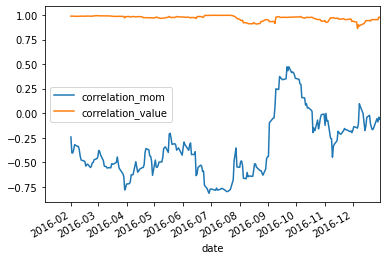

In [46]:

# Plot the correlations
df['correlation_mom'].plot()
df['correlation_value'].plot()
plt.legend()
plt.show()

## Value factor
In the previous exercise you've looked at the S&P500 exposures, and saw that there was a large consistent exposure to the value factor, but a very fluctuating correlation to momentum.

Let's now check how our portfolio measures up to this, and let's especially focus on value. Available to you is a DataFrame called factor_data containing the factor returns as well as your portfolio returns. Start by inspecting the DataFrame factor_data in the IPython shell using factor_data.head().

In [47]:
factor_data = df[['WML', 'value_factor', 'portfolio']]
factor_data.columns = ['momentum', 'value', 'portfolio']

In [48]:
factor_data.head()

,momentum,value,portfolio
date,,,
2016-01-04,-1.69,-1.53,-1.651745
2016-01-05,0.38,0.10,0.408161
2016-01-06,1.27,-1.22,0.325555
2016-01-07,0.21,-2.38,-0.698259
2016-01-08,-0.20,-0.91,-0.959352


In [49]:
# Calculate the pairwise correlation
factor_data.corr()

,momentum,value,portfolio
momentum,1.000000,-0.363237,0.001012
value,-0.363237,1.000000,0.767663
portfolio,0.001012,0.767663,1.000000


c:\users\brama\miniconda3\envs\fin\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


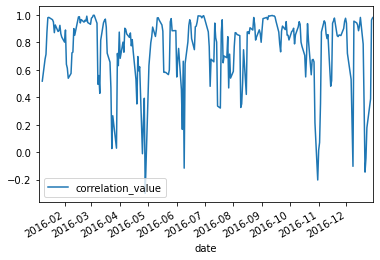

In [50]:
# Calculate the pairwise correlation
factor_data.corr()

# Calculate rolling 5 day correlation 
factor_data['correlation_value']=factor_data['portfolio'].rolling(5).corr(factor_data['value'])

# Plot the rolling correlation
factor_data['correlation_value'].plot()
plt.legend()
plt.show()

## Fama French factor correlations
In this exercise you want to check how much correlation your portfolio returns have with the Fama French factors. With a quick correlation table, you can very easily gain insight into how your portfolio returns move with for example the excess market return or the size and value factors. Remember, the Fama French factor model was defined as follows:

Rpf=α+βmMKT+βsSMB+βhHML

Available is the data containing the factor returns and your portfolio returns under factor_returns. Let's give it a try!

In [51]:
factor_returns = pd.read_csv('./factors_pf_returns.csv', parse_dates=True, index_col='date')

In [52]:
# Print the correlation table 
print(factor_returns.corr())

              Mkt-RF       SMB       HML        RF  pf_returns
Mkt-RF      1.000000  0.331250  0.099800  0.087073    0.738586
SMB         0.331250  1.000000 -0.108081  0.076750    0.162303
HML         0.099800 -0.108081  1.000000 -0.049019   -0.237647
RF          0.087073  0.076750 -0.049019  1.000000    0.039383
pf_returns  0.738586  0.162303 -0.237647  0.039383    1.000000


## Linear regression model
In this exercise you're going to use the Fama French model to explain the returns in your portfolio. You'll first walk through the linear regression model taking all the different steps, and obtain the summary at the end to interpret the results.

In this exercise you'll use statsmodels. You might have come across the linear regression model in scikit-learn. If you are curious how the two options compare, you can read more in this blogpost.

Available is a dataset called factor_returns which contains portfolio returns as well as the Fama French factors. Good luck!

In [53]:
import statsmodels.api as sm

In [54]:
# Define the model
model = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit()

In [55]:
# Create model predictions
predictions = model.predict(factor_returns[['Mkt-RF','SMB', 'HML']]) 

In [56]:
# Print out the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             pf_returns   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.653
Method:                 Least Squares   F-statistic:                              158.8
Date:                Wed, 20 May 2020   Prob (F-statistic):                    1.55e-57
Time:                        15:08:48   Log-Likelihood:                         -185.67
No. Observations:                 252   AIC:                                      377.3
Df Residuals:                     249   BIC:                                      387.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.8234      0.040     20.627      0.000       0.745       0.902
SMB           -0.2272      0.064     -3.545      0.000      -0.353      -0.101
HML           -0.4826      0.056     -8.611      0.000      -0.593      -0.372
==============================================================================
Omnibus:                      143.224   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1746.552
Skew:                           1.972   Prob(JB):                         0.00
Kurtosis:                      15.279   Cond. No.                         1.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Fama French Factor model
In this exercise, you are going focus on efficiently obtaining just the beta coefficients of the Fama French model. As you've seen in the video, those betas indicate how much of the portfolio's return changes if that particular factor's return changes.

Sometimes, all you want to do is to check whether the factor relates negatively, or positively to you portfolio returns. You can see this directly from the signs of the coefficients. Available again is the factor_returns data for you. Let's try!

In [57]:
# Import statsmodels
import statsmodels.api as sm

# Obtain the beta coefficients
b1, b2, b3 = sm.OLS(factor_returns['pf_returns'], factor_returns[['Mkt-RF','SMB', 'HML']]).fit().params

# Print the betas
print ('Sensitivities of active returns to factors:\nMkt-Rf: %f\nSMB: %f\nHML: %f' %  (b1, b2, b3))

Sensitivities of active returns to factors:
Mkt-Rf: 0.823443
SMB: -0.227198
HML: -0.482598


## Performance tear sheet
In this exercise, you're going to create a full performance tear sheet on the S&P500 returns. You'll see that the elaborate calculations you've done in previous chapters, can very quickly be generated with this simple tear sheet, and by inputting just the returns data. In that sense, this tear sheet can save you a lot of time!

In the first few steps, you'll have to make sure that the data is in the right format otherwise, Pyfolio will give an error. The returns data is available as returns_sp500. Go ahead and inspect the returns_sp500 data in the IPython shell using returns_sp500.head().

In [58]:
sp500 = pd.read_csv('sp500.csv', index_col='date', parse_dates=True)
returns_sp500 = sp500.pct_change()
returns_sp500.iloc[0] = 0
returns_sp500.head()

,S&P500
date,
2015-01-02,0.000000
2015-01-05,-0.018278
2015-01-06,-0.008893
2015-01-07,0.011630
2015-01-08,0.017888


In [59]:
# Ensure the returns are a series
returns=returns_sp500['S&P500']

# Check the type
print(type(returns.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [60]:
import pyfolio as pf

c:\users\brama\miniconda3\envs\fin\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


Start date,2015-01-02
End date,2019-03-19
Total months,50
,Backtest
Annual return,7.896%
Cumulative returns,37.624%
Annual volatility,13.662%
Sharpe ratio,0.62
Calmar ratio,0.40
Stability,0.85
Max drawdown,-19.778%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,19.78,2018-09-20,2018-12-24,NaT,NaN
1,14.16,2015-05-21,2016-02-11,2016-07-11,298
2,10.16,2018-01-26,2018-02-08,2018-08-24,151
3,4.79,2016-08-15,2016-11-04,2016-11-21,71
4,3.64,2015-03-02,2015-03-11,2015-04-24,40


c:\users\brama\miniconda3\envs\fin\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\brama\miniconda3\envs\fin\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\brama\miniconda3\envs\fin\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\users\brama\miniconda3\envs\fin\

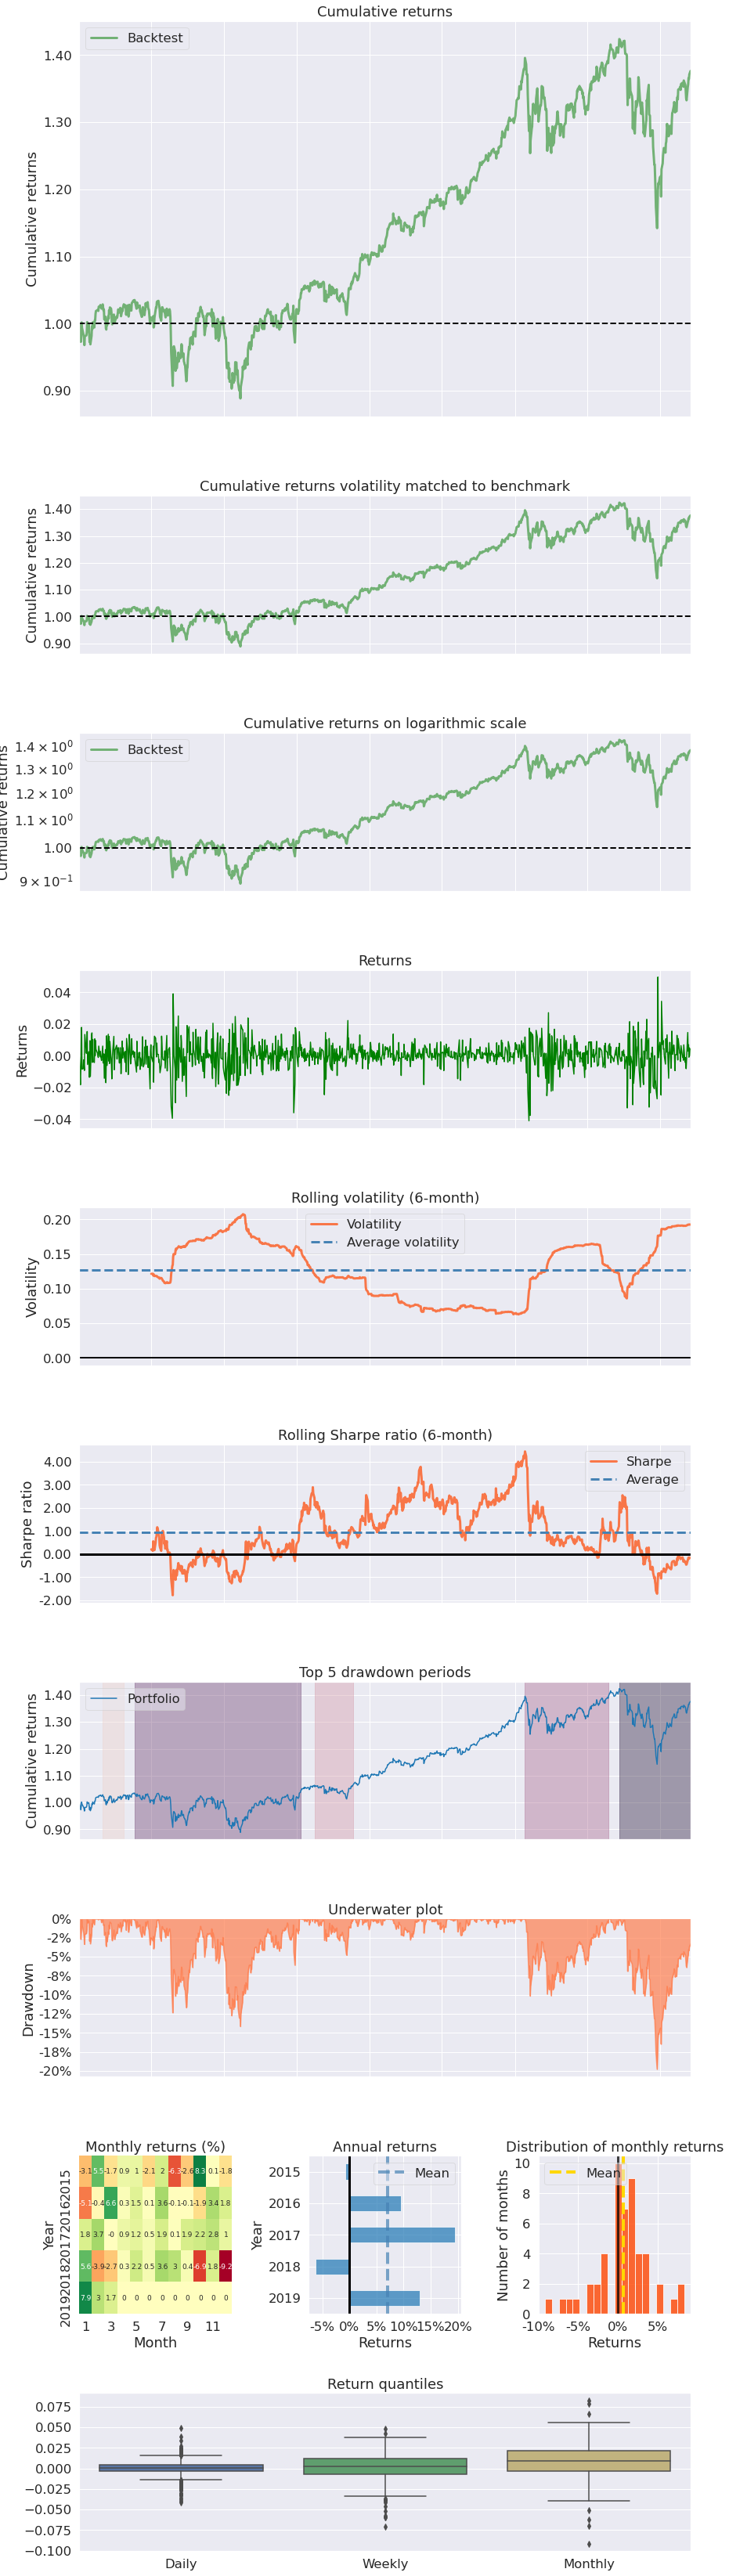

In [61]:
# Create the returns tear sheet
fig = pf.create_returns_tear_sheet(returns)


# Chapter 4

## Calculating expected risk and returns
For this exercise, you're going to start with the raw price data. What you'll need for portfolio optimization, is the expected risk and return from this data.

With PyPortfolioOpt, you can calculate the expected risk and return in just one line of code, so that makes it very easy for you. The library you need is called pypfopt in short. FYI, you'll see in the next exercise that PyPortfolioOpt gives you the same output if you were to calculate it by hand. Let's give it a try!

In [62]:
# Import the packages 
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

In [63]:
stock_prices = pd.read_csv('./small_portfolio.csv', parse_dates=True, index_col='date')
stock_prices.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


In [64]:
# Calculate expected returns mu 
mu = expected_returns.mean_historical_return(stock_prices)

# Calculate the covariance matrix S
Sigma = risk_models.sample_cov(stock_prices)
type(Sigma)

pandas.core.frame.DataFrame

In [65]:


# Obtain the efficient frontier
ef = EfficientFrontier(mu,Sigma)
print (mu, Sigma)

GE     -0.170134
JPM     0.193822
MSFT    0.228539
PG     -0.036344
dtype: float64             GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810


## PyPortfolioOpt risk functions
The objective of the Markowitz portfolio optimization problem is to minimize the portfolio variance, given a bunch of constraints. Do you remember how you calculate this from chapter 2? Portfolio variance = weights transposed * covariance matrix * weights. WithPyPortfolioOpt we call the covariance matrix sigma, to denote that this is a sample covariance Σ.

In this exercise you will see that thePyPortfolioOpt functions to calculate sigma, gives the exact same result if you were to calculate the covariance by hand. The same goes for the expected return calculations, you can also verifyPyPortfolioOpt gives the same output as calculating annualized daily returns by hand. Available are the stock_prices. Let's explore this a bit further...

In [66]:
# Get the returns from the stock price data
returns=stock_prices.pct_change()

# Calculate the annualized covariance matrix 
covMatrix = returns.cov()*252

# Calculate the covariance matrix Sigma from a`PyPortfolioOpt` function
Sigma = risk_models.sample_cov(stock_prices)

# Print both covariance matrices
print (covMatrix)
print(Sigma)

            GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810
            GE       JPM      MSFT        PG
GE    0.046355  0.023011  0.016415  0.010182
JPM   0.023011  0.047033  0.024328  0.010899
MSFT  0.016415  0.024328  0.054486  0.014257
PG    0.010182  0.010899  0.014257  0.020810


## Optimal portfolio performance
Let's now continue with the efficient frontier ef that you calculated in a previous exercise for the small portfolio. You still need to select an optimal portfolio from that efficient frontier ef, and check its performance. Let's use the efficient_return option. This function selects the portfolio with the minimized risk given a target return. A portfolio manager is often asked to manage a portfolio under certain risk and return constraints, so this is a very useful function for that.

mu and Sigma are already calculated for you and ef is also available.

In [67]:
# Get the minimum risk portfolio for a target return 
weights = ef.efficient_return(0.2)
print (weights)

# Show portfolio performance 
ef.portfolio_performance(verbose=True)

{'GE': 0.0, 'JPM': 0.4858010595386604, 'MSFT': 0.4701282549370604, 'PG': 0.0440706855242792}
Expected annual return: 20.0%
Annual volatility: 18.8%
Sharpe Ratio: 0.96


(0.19999999999999996, 0.18802343263172966, 0.9573274856254501)

## Portfolio optimization: Max Sharpe
In this exercise, you're going to calculate the portfolio that gives the Maximum Sharpe ratio. Often, this is the portfolio the investor wants to invest in, as it provides the highest possible return to risk ratio.PyPortfolioOpt makes it very easy to calculate this portfolio from a set of historical price data.

Available for you are the mean historic return for a small portfolio of stocks under mu and a covariance matrix belonging to our portfolio under Sigma. You'll need these as inputs to calculate the Efficient Frontier and Maximum Sharpe portfolio. Let's try it!

In [68]:
# Define the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()
print (raw_weights_maxsharpe, cleaned_weights_maxsharpe)

{'GE': 0.0, 'JPM': 0.4407688290943612, 'MSFT': 0.5592311709056388, 'PG': 0.0} {'GE': 0.0, 'JPM': 0.44077, 'MSFT': 0.55923, 'PG': 0.0}


## Minimum volatility optimization
In this exercise, you're going to compare the minimum volatility and the Maximum Sharpe portfolios. As a portfolio manager you often want to understand how your chosen portfolio measures up to the minimum volatility portfolio. WithPyPortfolioOpt you can compare the two quickly, without having to write two different constrained optimization problems, which can be quite complex. Available for you is the efficient frontier from the previous exercise under ef. Let's give it a try!

In [69]:
# Define the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_minvol = ef.min_volatility()
cleaned_weights_minvol = ef.clean_weights()

# Show portfolio performance 
print(cleaned_weights_minvol)
perf_min_volatility=ef.portfolio_performance(verbose=True)

{'GE': 0.15732, 'JPM': 0.11714, 'MSFT': 0.04704, 'PG': 0.6785}
Expected annual return: -1.8%
Annual volatility: 13.3%
Sharpe Ratio: -0.29


In [70]:
# Define the efficient frontier
ef = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum Sharpe ratio portfolio
raw_weights_maxsharpe = ef.max_sharpe()
cleaned_weights_maxsharpe = ef.clean_weights()

# Show portfolio performance 
print(cleaned_weights_maxsharpe)
perf_max_sharpe=ef.portfolio_performance(verbose=True)

{'GE': 0.0, 'JPM': 0.44077, 'MSFT': 0.55923, 'PG': 0.0}
Expected annual return: 21.3%
Annual volatility: 19.5%
Sharpe Ratio: 0.99


## Comparing max Sharpe to min vol
In this exercise let's have a closer look at the weights and performance of the Maximum Sharpe and minimum volatility portfolios, and compare them. This exercise will help you understand the characteristics of these two different portfolios. Available are cleaned_weights_minvol, cleaned_weights_maxsharpe, perf_min_volatility, and perf_max_sharpe.

In [71]:
# Print min vol and max sharpe results
print(cleaned_weights_minvol,cleaned_weights_maxsharpe,perf_min_volatility,perf_max_sharpe, sep="\n")

{'GE': 0.15732, 'JPM': 0.11714, 'MSFT': 0.04704, 'PG': 0.6785}
{'GE': 0.0, 'JPM': 0.44077, 'MSFT': 0.55923, 'PG': 0.0}
(-0.01797054140569935, 0.13292386607830184, -0.28565631233846245)
(0.21323694105198526, 0.19537311431439253, 0.9890661861541002)


## Exponentially weighted returns and risk
In this exercise, you're going to perform portfolio optimization with a slightly different way of estimating risk and returns; you're going to give more weight to recent data in the optimization.

This is a smart way to deal with stock data that is typically non-stationary, i.e., when the distribution changes over time. Implementation can be quickly done by changing the risk model you use to calculate Sigma, and the returns calculation you use to get mu. The stock prices dataset is available as stock_prices. Let's try!

In [72]:
# Define exponentially weightedSigma and mu using stock_prices
Sigma = risk_models.exp_cov(stock_prices, span=180, frequency=252)
mu = expected_returns.ema_historical_return(stock_prices, frequency=252, span=180)

# Calculate the efficient frontier
ef_2 = EfficientFrontier(mu, Sigma)

# Calculate weights for the maximum sharpe ratio optimization
raw_weights_maxsharpe = ef_2.max_sharpe()
cleaned_weights_maxsharpe_EW = ef_2.clean_weights()
# Show portfolio performance 
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)

Expected annual return: 23.4%
Annual volatility: 23.8%
Sharpe Ratio: 0.90


## Comparing approaches
In this exercise, you're going to investigate whether the maximum Sharpe portfolios differ when you are using the normal historic expected risk and returns, and when using the exponentially weighted risk and returns. You saw during the video that the exponentially weighted volatility follows the real volatility much closer, but do you actually see a big difference in the portfolio weights when using one, or the other? That's what you'll find out.

The exponentially weighted risk and return have been calculated using a span of 252 trading days, so it looks back through a maximum period of a year. Available for you are: cleaned_weights_maxsharpe, perf_max_sharpe, cleaned_weights_maxsharpe_EW, perf_max_sharpe_EW. The _EW part stands for exponentially weighted.

In [73]:
# Print the weights of both portfolios types
print(cleaned_weights_maxsharpe, cleaned_weights_maxsharpe_EW, sep="\n")

{'GE': 0.0, 'JPM': 0.44077, 'MSFT': 0.55923, 'PG': 0.0}
{'GE': 0.0, 'JPM': 0.18777, 'MSFT': 0.81223, 'PG': 0.0}


In [74]:
# Print the performance of both portfolios types
perf_max_sharpe = ef.portfolio_performance(verbose=True)
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)

Expected annual return: 21.3%
Annual volatility: 19.5%
Sharpe Ratio: 0.99
Expected annual return: 23.4%
Annual volatility: 23.8%
Sharpe Ratio: 0.90


## Changing the span
At the last exercise you discovered that the span of the exponentially weighted risk and return can have an impact on what the optimal portfolio looks like. In fact, the span has a very big influence! By setting the span, you can either use data for say only the most recent days, or use data from the most recent years. In the limit, when the span is as long as the full sample, it will be equal to using the normal historic mean.

Now let's get a feel for how a short and long span changes your optimal portfolio. Available is the stock_prices data.

In [75]:
# Calculate expected returns and sample covariance
mu_ema = expected_returns.ema_historical_return(stock_prices, span=504 ,frequency=252)
Sigma_ew = risk_models.exp_cov(stock_prices, span=504, frequency=252)
ef_2 = EfficientFrontier(mu_ema, Sigma_ew)

# Calculate weights for the maximum Sharpe ratio portfolio
weights = ef_2.max_sharpe()
cleaned_weights_maxsharpe_EW = ef_2.clean_weights()
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)

Expected annual return: 26.4%
Annual volatility: 18.5%
Sharpe Ratio: 1.32


In [76]:
# Calculate expected returns and sample covariance
mu_ema = expected_returns.ema_historical_return(stock_prices, span=10 ,frequency=252)
Sigma_ew = risk_models.exp_cov(stock_prices, span=10, frequency=252)
ef_2 = EfficientFrontier(mu_ema, Sigma_ew)

# Calculate weights for the maximum Sharpe ratio portfolio
weights = ef_2.max_sharpe()
cleaned_weights_maxsharpe_EW = ef_2.clean_weights()
perf_max_sharpe_EW = ef_2.portfolio_performance(verbose=True)

Expected annual return: 12.1%
Annual volatility: 17.0%
Sharpe Ratio: 0.59
